<a href="https://colab.research.google.com/github/aprajeeta10/python-projects/blob/main/Predicting_Stock_Price_Direction_using_Support_Vector_Machines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Machine learning
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# For data manipulation
import pandas as pd
import numpy as np

# To plot
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Read the csv file using read_csv of Reliance historical data
# method of pandas
df = pd.read_csv('RS.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-09-16,106.629997,107.900002,105.959999,106.410004,99.885727,515400
1,2020-09-17,105.389999,108.349998,103.910004,107.480003,100.890121,271200
2,2020-09-18,108.139999,109.180000,105.779999,106.599998,100.064064,725000
3,2020-09-21,104.349998,104.529999,100.000000,101.250000,95.042084,299600
4,2020-09-22,101.349998,102.500000,99.980003,100.790001,94.610291,317100
...,...,...,...,...,...,...,...
247,2021-09-09,147.990005,150.100006,147.500000,148.649994,142.122665,328900
248,2021-09-10,149.600006,150.889999,148.149994,148.589996,142.065292,424700
249,2021-09-13,150.539993,150.539993,147.770004,149.619995,143.050064,358500
250,2021-09-14,149.139999,149.139999,145.550003,146.039993,139.627274,218000


In [5]:
# Changes The Date column as index columns
df.index = pd.to_datetime(df['Date'])
df

# drop The original date column
df = df.drop(['Date'], axis='columns')
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-09-16,106.629997,107.900002,105.959999,106.410004,99.885727,515400
2020-09-17,105.389999,108.349998,103.910004,107.480003,100.890121,271200
2020-09-18,108.139999,109.180000,105.779999,106.599998,100.064064,725000
2020-09-21,104.349998,104.529999,100.000000,101.250000,95.042084,299600
2020-09-22,101.349998,102.500000,99.980003,100.790001,94.610291,317100
...,...,...,...,...,...,...
2021-09-09,147.990005,150.100006,147.500000,148.649994,142.122665,328900
2021-09-10,149.600006,150.889999,148.149994,148.589996,142.065292,424700
2021-09-13,150.539993,150.539993,147.770004,149.619995,143.050064,358500


In [6]:
# Create predictor variables
df['Open-Close'] = df.Open - df.Close
df['High-Low'] = df.High - df.Low

# Store all predictor variables in a variable X
X = df[['Open-Close', 'High-Low']]
X.head()

,Open-Close,High-Low
Date,,
2020-09-16,0.219993,1.940003
2020-09-17,-2.090004,4.439994
2020-09-18,1.540001,3.400001
2020-09-21,3.099998,4.529999
2020-09-22,0.559997,2.519997


In [7]:
# Target variables
y = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)
y

array([1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0])

In [8]:
split_percentage = 0.8
split = int(split_percentage*len(df))

# Train data set
X_train = X[:split]
y_train = y[:split]

# Test data set
X_test = X[split:]
y_test = y[split:]

In [9]:
# Support vector classifier
cls = SVC().fit(X_train, y_train)

In [10]:
df['Predicted_Signal'] = cls.predict(X)

In [11]:
# Calculate daily returns
df['Return'] = df.Close.pct_change()

# Calculate strategy returns
df['Strategy_Return'] = df.Return *df.Predicted_Signal.shift(1)

# Calculate Cumulutive returns
df['Cum_Ret'] = df['Return'].cumsum()
df

# Plot Strategy Cumulative returns
df['Cum_Strategy'] = df['Strategy_Return'].cumsum()
df

,Open,High,Low,Close,Adj Close,Volume,Open-Close,High-Low,Predicted_Signal,Return,Strategy_Return,Cum_Ret,Cum_Strategy
Date,,,,,,,,,,,,,
2020-09-16,106.629997,107.900002,105.959999,106.410004,99.885727,515400,0.219993,1.940003,1,NaN,NaN,NaN,NaN
2020-09-17,105.389999,108.349998,103.910004,107.480003,100.890121,271200,-2.090004,4.439994,1,0.010055,0.010055,0.010055,0.010055
2020-09-18,108.139999,109.180000,105.779999,106.599998,100.064064,725000,1.540001,3.400001,1,-0.008188,-0.008188,0.001868,0.001868
2020-09-21,104.349998,104.529999,100.000000,101.250000,95.042084,299600,3.099998,4.529999,1,-0.050188,-0.050188,-0.048320,-0.048320
2020-09-22,101.349998,102.500000,99.980003,100.790001,94.610291,317100,0.559997,2.519997,1,-0.004543,-0.004543,-0.052863,-0.052863
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-09,147.990005,150.100006,147.500000,148.649994,142.122665,328900,-0.659989,2.600006,1,0.004121,0.004121,0.374405,0.407968
2021-09-10,149.600006,150.889999,148.149994,148.589996,142.065292,424700,1.010010,2.740005,1,-0.000404,-0.000404,0.374001,0.407565
2021-09-13,150.539993,150.539993,147.770004,149.619995,143.050064,358500,0.919998,2.769989,1,0.006932,0.006932,0.380933,0.414497


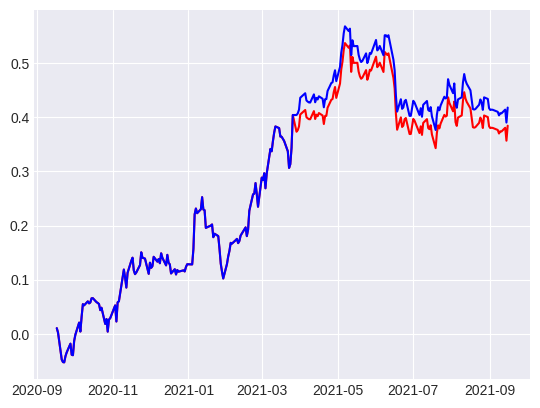

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(df['Cum_Ret'],color='red')
plt.plot(df['Cum_Strategy'],color='blue')